In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DataSet/Pokemon.csv')

Mounted at /content/drive


In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df['Type 1'].value_counts() #burada pokemonları bilmediğim için isimlerini görmek istedim

,count
Type 1,
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Ground,32


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
#,800.0,NaN,NaN,NaN,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Name,800,800,PumpkabooSuper Size,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type 1,800,18,Water,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type 2,800,18,Flying,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,800.0,NaN,NaN,NaN,435.1025,119.96304,180.0,330.0,450.0,515.0,780.0
HP,800.0,NaN,NaN,NaN,69.25875,25.534669,1.0,50.0,65.0,80.0,255.0
Attack,800.0,NaN,NaN,NaN,79.00125,32.457366,5.0,55.0,75.0,100.0,190.0
Defense,800.0,NaN,NaN,NaN,73.8425,31.183501,5.0,50.0,70.0,90.0,230.0
Sp. Atk,800.0,NaN,NaN,NaN,72.82,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,NaN,NaN,NaN,71.9025,27.828916,20.0,50.0,70.0,90.0,230.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.isnull().sum() # burada type 2 için eksik değerler olduğunu gördüm. verinin büyük bir kısmını kapsamadığı için doldurmaya karar verdim.

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [8]:
type2_mod = df['Type 2'].mode()[0]
df['Type 2'].fillna(type2_mod,inplace=True) # burada değişiklik yaparken de inplace parametresinin gelecekte hata verebileceğini, orijinal df'de değişiklik yapmayacağını öğrendim yani a = a+b kullanımı daha doğru aslında.

/tmp/ipython-input-3809715682.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna(type2_mod,inplace=True) # burada değişiklik yaparken de inplace parametresinin gelecekte hata verebileceğini, orijinal df'de değişiklik yapmayacağını öğrendim yani a = a+b kullanımı daha doğru aslında.


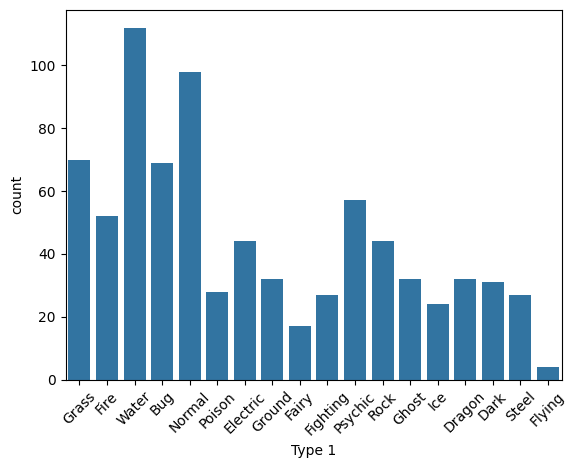

In [20]:
sns.countplot(x='Type 1', data=df,)
plt.xticks(rotation=45)
plt.show() #hızlıca kategorilerin dağılımlarını görmek istiyorum

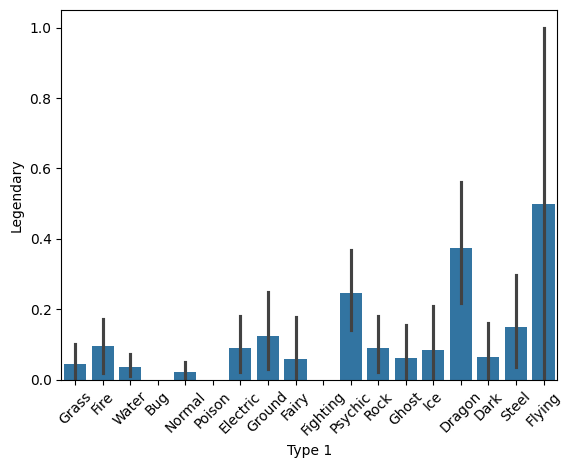

In [48]:
sns.barplot(data=df,x='Type 1', y='Legendary')
plt.xticks(rotation=45)
plt.show()

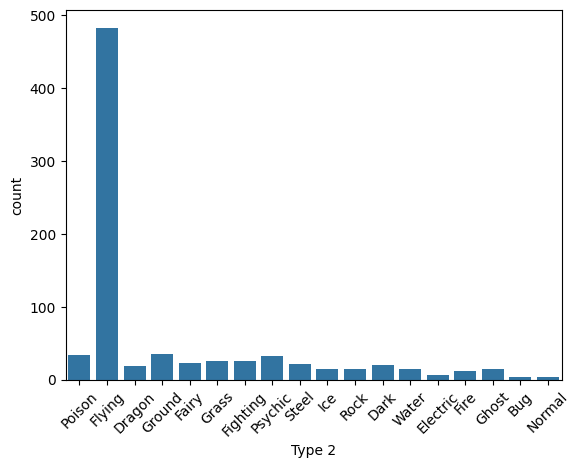

In [21]:
sns.countplot(x='Type 2', data=df)
plt.xticks(rotation=45)
plt.show()

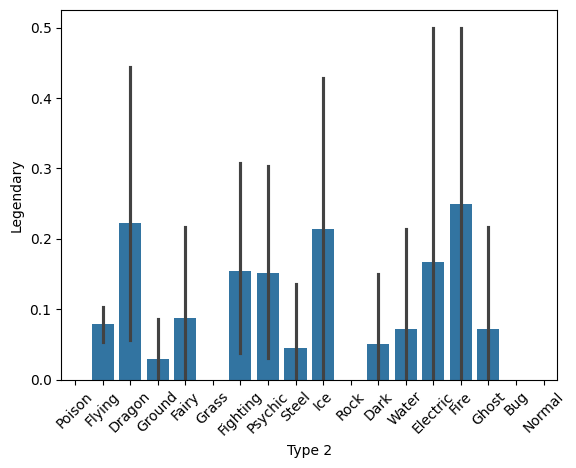

In [50]:
sns.barplot(data=df,x='Type 2', y='Legendary')
plt.xticks(rotation=45)
plt.show()

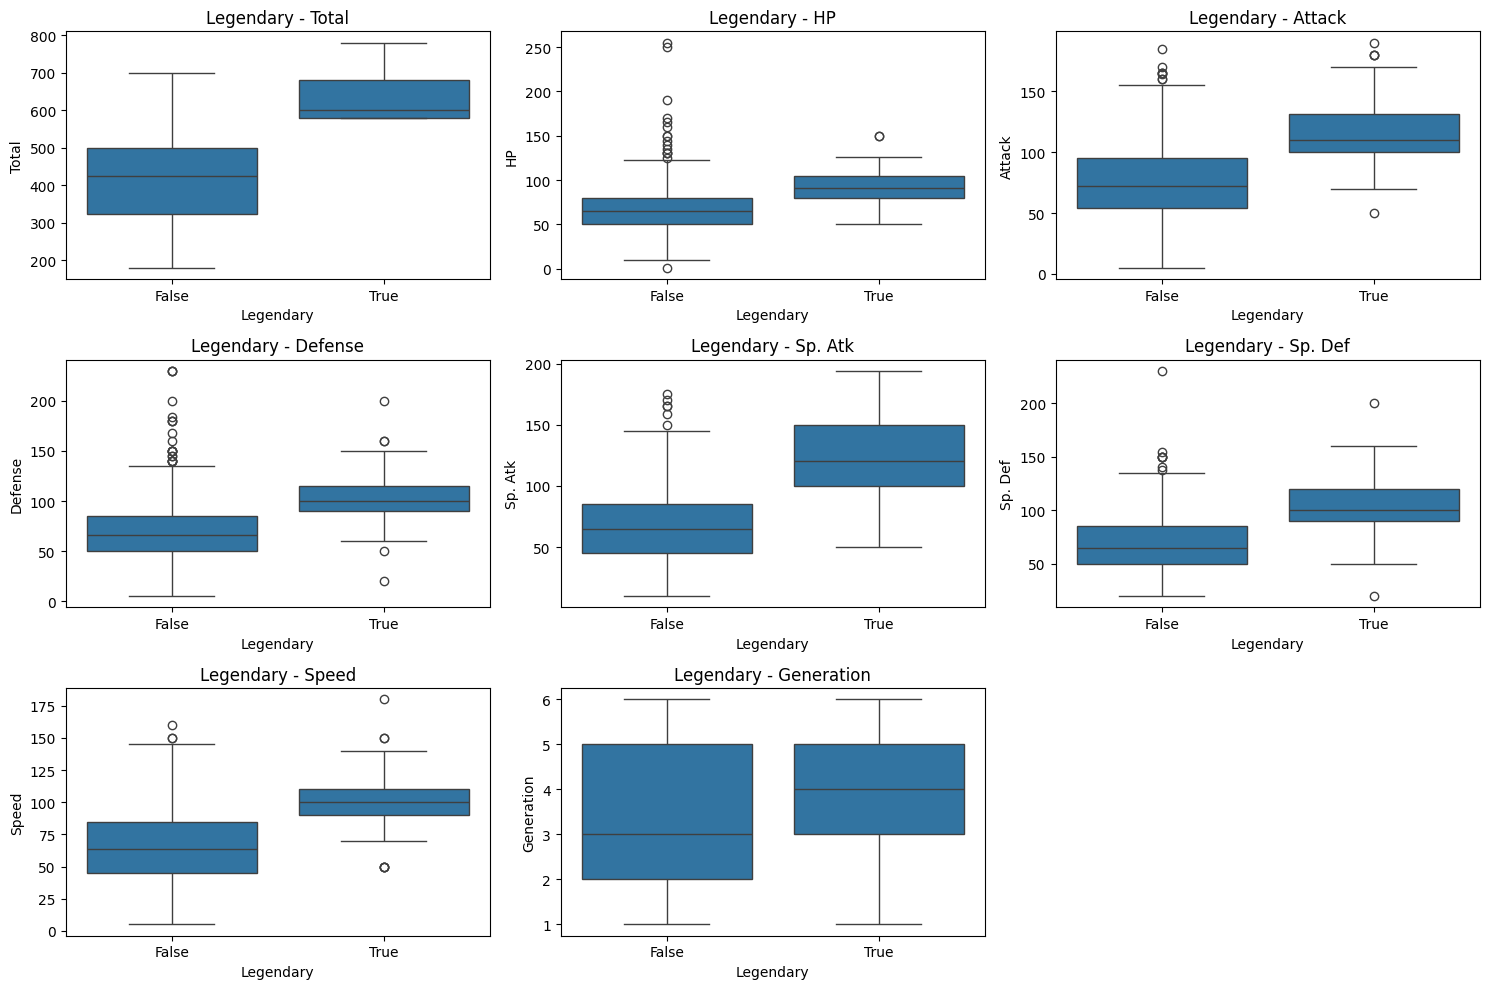

In [41]:
# burada df.drop ile # col'u attım tekrar çalıştırınca hata verdiği için kod yok
sayisal_cols = df.select_dtypes(include=['int64', 'float64']).columns  #sayısal sütunları seçip 3 satırda grafikleri görmek istiyorum

plt.figure(figsize=(15, 10))

for i, col in enumerate(sayisal_cols, 1):
    plt.subplot(3, (len(sayisal_cols)+1)//3, i)
    sns.boxplot(x='Legendary', y=col, data=df)
    plt.title(f'Legendary - {col}')

plt.tight_layout()
plt.show()


<Axes: >

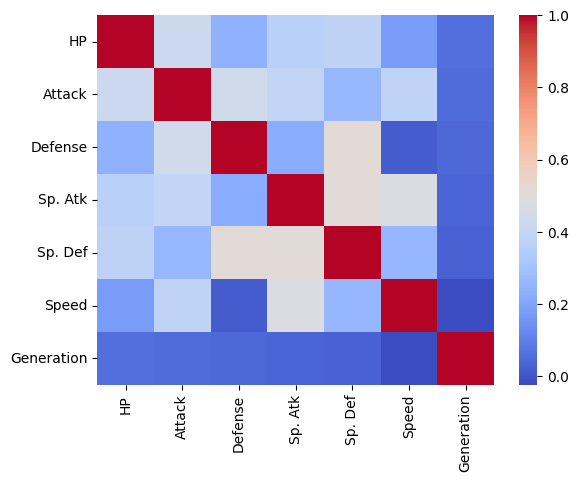

In [66]:
sayisal_cols = df.select_dtypes(include=['int64', 'float64'])
sayisal_cols_df = pd.DataFrame(sayisal_cols)
matris = sayisal_cols_df.corr()
sns.heatmap(matris, cmap='coolwarm', fmt='.2f') # total feature'ını çıkarmaya karar verdim çünkü diğer feature'ların bir özeti niteliğinde, yüksek korelasyona sebep oluyor

In [58]:
df = df.drop('Total', axis=1)
print(df.columns)

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


/tmp/ipython-input-2843310600.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/tmp/ipython-input-2843310600.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/tmp/ipython-input-2843310600.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/tmp/ipython-input-2843310600.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
/tmp/ipython-input-2843310600.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


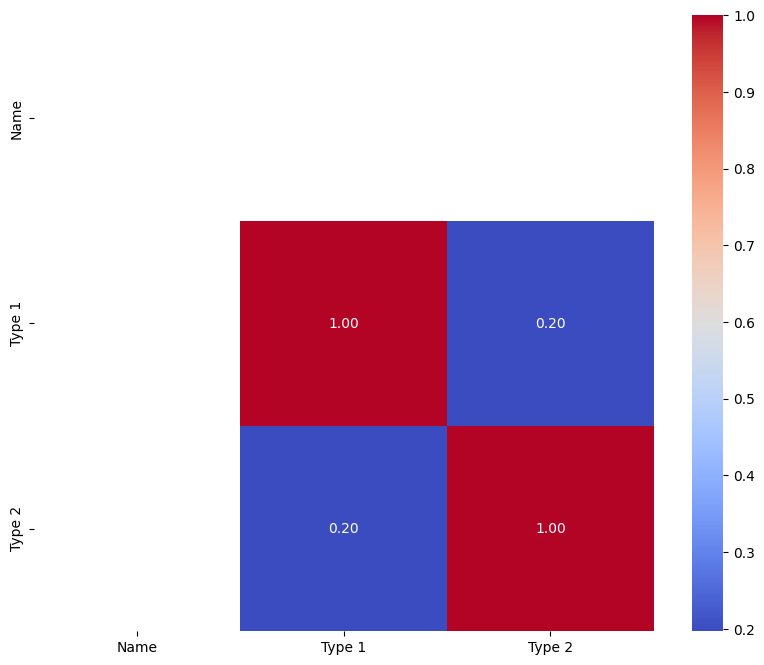

In [65]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):    # bu kısımda chatgpten yardım aldım çünkü kategorik verilerin korelasyonu klasik yöntem ile bulunamıyor
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


kategorik_cols = df.select_dtypes(include='object')
cols = kategorik_cols.columns
matris_cat = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

for col1 in cols:
    for col2 in cols:
        matris_cat.loc[col1, col2] = cramers_v(kategorik_cols[col1], kategorik_cols[col2])

plt.figure(figsize=(10,8))
sns.heatmap(matris_cat, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

<Axes: xlabel='Legendary', ylabel='Count'>

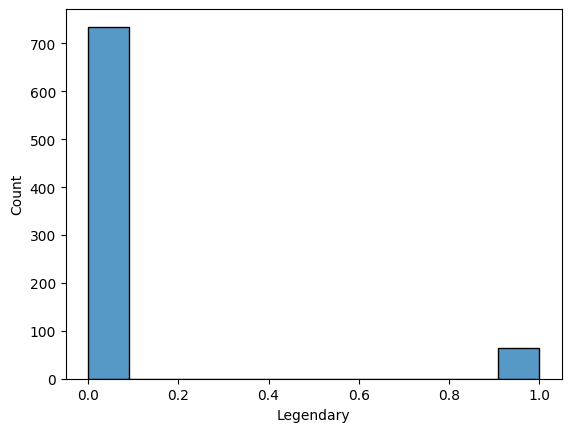

In [36]:
sns.histplot(data=df, x='Legendary')

In [69]:
skew_values = sayisal_cols.skew()
kurt_values = sayisal_cols.kurtosis()

print("Çarpıklık değerleri:\n", skew_values)
print("\nBasıklık değerleri:\n", kurt_values)

Çarpıklık değerleri:
 HP            1.568224
Attack        0.551614
Defense       1.155912
Sp. Atk       0.744662
Sp. Def       0.854019
Speed         0.357933
Generation    0.014258
dtype: float64

Basıklık değerleri:
 HP            7.232078
Attack        0.169717
Defense       2.726260
Sp. Atk       0.297894
Sp. Def       1.628394
Speed        -0.236437
Generation   -1.239576
dtype: float64


HP ve Defense için log dönüşümü uygulamaya karar verdim. Attack için de karekök dönüşümü (logdan daha hafif). Speed ve Generation neredeyse simetrik, dönüşüm uygulamayacağım.

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler
import numpy as np
import pandas as pd


log_cols = ['HP', 'Defense']
sqrt_cols = ['Attack']
robust_cols = ['Sp. Atk', 'Sp. Def', 'Speed']


log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scale', RobustScaler())
])

sqrt_pipeline = Pipeline([
    ('sqrt', FunctionTransformer(np.sqrt, validate=True)),
    ('scale', RobustScaler())
])

robust_pipeline = RobustScaler()


preprocessor = ColumnTransformer(transformers=[
    ('log', log_pipeline, log_cols),
    ('sqrt', sqrt_pipeline, sqrt_cols),
    ('robust', robust_pipeline, robust_cols)
], remainder='passthrough')

y = df['Legendary']
X = df.drop(columns=['Legendary'])
X_transformed = preprocessor.fit_transform(X)


new_cols = (
    [f'log_{col}' for col in log_cols] +
    [f'sqrt_{col}' for col in sqrt_cols] +
    [f'robust_{col}' for col in robust_cols] +
    [col for col in X.columns if col not in log_cols + sqrt_cols + robust_cols]
)

df_transformed = pd.DataFrame(X_transformed, columns=new_cols)

df_transformed.head()


,log_HP,log_Defense,sqrt_Attack,robust_Sp. Atk,robust_Sp. Def,robust_Speed,Name,Type 1,Type 2,Generation
0,-0.780361,-0.60559,-0.642563,0.0,-0.125,-0.444444,Bulbasaur,Grass,Poison,1
1,-0.170292,-0.179259,-0.304298,0.331492,0.25,-0.111111,Ivysaur,Grass,Poison,1
2,0.442681,0.290375,0.152926,0.773481,0.75,0.333333,Venusaur,Grass,Poison,1
3,0.442681,0.962986,0.518517,1.259669,1.25,0.333333,VenusaurMega Venusaur,Grass,Poison,1
4,-1.082468,-0.82636,-0.56086,-0.110497,-0.5,0.0,Charmander,Fire,Flying,1


In [105]:
df_encoded = pd.get_dummies(df_transformed, columns=['Type 1', 'Type 2'])
df_encoded['Legendary'] = y.values
df_encoded = df_encoded.drop('Name', axis=1)
df_encoded.head() #burayı da pipeline'a dahil edebileceğimi sonradan fark ettim

,log_HP,log_Defense,sqrt_Attack,robust_Sp. Atk,robust_Sp. Def,robust_Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Legendary
0,-0.780361,-0.60559,-0.642563,0.0,-0.125,-0.444444,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,-0.170292,-0.179259,-0.304298,0.331492,0.25,-0.111111,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.442681,0.290375,0.152926,0.773481,0.75,0.333333,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.442681,0.962986,0.518517,1.259669,1.25,0.333333,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.082468,-0.82636,-0.56086,-0.110497,-0.5,0.0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc'
}

X = df_encoded.drop(columns=['Legendary'])
y = df_encoded['Legendary']

results = []
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    mean_scores = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring.keys()}
    mean_scores['model'] = name
    results.append(mean_scores)

results_df = pd.DataFrame(results).set_index('model')
results_df = results_df.sort_values(by='accuracy', ascending=False)
print(results_df)

                  accuracy  precision    recall        f1   roc_auc
model                                                              
SVC                0.94375   0.883281  0.709942  0.749205  0.973417
AdaBoost           0.93625   0.814481  0.747933  0.764046  0.958765
RandomForest       0.93250   0.838626  0.640712  0.683454  0.940502
GradientBoosting   0.92875   0.786529  0.687755  0.708054  0.953166
KNN                0.92125   0.769260  0.641601  0.656303  0.798692
DecisionTree       0.91875   0.723783  0.689325  0.697967  0.689325


In [115]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "SVC": (SVC(probability=True), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }),
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    }),
    "GradientBoosting": (GradientBoostingClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    })
}

best_models = {}
results = []

for name, (model, params) in models.items():
    print(f"\n{name} için GridSearch başlıyor...")
    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model


    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append([name, acc, prec, rec, f1, roc, grid.best_params_])


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC_AUC", "Best_Params"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n=== Sonuçlar ===")
print(results_df)


SVC için GridSearch başlıyor...

RandomForest için GridSearch başlıyor...

GradientBoosting için GridSearch başlıyor...

=== Sonuçlar ===
              Model  Accuracy  Precision    Recall        F1   ROC_AUC  \
0      RandomForest   0.93125   0.666667  0.307692  0.421053  0.957614   
1               SVC   0.92500   0.545455  0.461538  0.500000  0.953951   
2  GradientBoosting   0.90625   0.400000  0.307692  0.347826  0.944532   

                                         Best_Params  
0  {'max_depth': 10, 'min_samples_split': 5, 'n_e...  
1        {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}  
2  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  


accuracy'de randomforest önde ama recall çok düşük - overfitting olabilir
scv recall daha iyi precision düşük
gradientboosting recall ve precision düşük
legendary sayısı az olduğu için dengesizlik olabilir, smote gibi yöntemler ile dengesizlik düzeltilebilir.